In [1]:
# Import Libraries

import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8) #Adjusts the configuration of the plots we will create

In [2]:
# Read in the data
df = pd.read_csv('movies.csv')

In [58]:
df.head()


name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

     released  score      votes       director              writer  \
5445      NaT    7.8  1100000.0  James Cameron       James Cameron   
7445      NaT    8.4   903000.0  Anthony Russo  Christopher Markus   
3045      NaT    7.8  1100000.0  James Cameron       James Cameron   
6663      NaT    7.8   876000.0    J.J. Abrams     Lawrence Kasdan   
7244      NaT    8.4   897000.0  Anthony Russo  Christopher Markus   

                   star        country     budget       gross  \
5445    Sam Worthington  United States  237000000  2847246203   
7445  Robert Downey Jr.  United States  356000000  2797501328   
3045  Leonardo DiCaprio  United States  200000000  2201647264   
6663       Daisy Ridley  United States  245000000  2069521700   
7244  Robert Downey Jr.  United States  321000000  2048359754   

                    company  runtime yearcorrect  
5445  Twentieth Century Fox    162.0         NaT  
7445         Marvel Studios    181.0         NaT  
3045  Twentieth Century Fox    194.0         NaT  
6663              Lucasfilm    138.0         NaT  
7244         Marvel Studios    149.0         NaT

In [4]:
# Let's see if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [5]:
# Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [10]:
# Change data type of columns

df['budget'] = df['budget'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')

In [11]:
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country    budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000   
2              Leigh Brackett       Mark Hamill   United States  18000000   
3                Jim Abrahams       Robert Hays   United States   3500000   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000   
...                       ...               ...             ...       ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000   
7664              Lisa Huston  Michael Saquella   United States         0   
7665             Lynno Lovert      Onyama Laura   United States     58750   
7666            James Randall     Christina Roz   United States     15000   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         0   

          gross                    company  runtime  
0      46998772               Warner Bros.    146.0  
1      58853106          Columbia Pictures    104.0  
2     538375067                  Lucasfilm    124.0  
3      83453539         Paramount Pictures     88.0  
4      39846344             Orion Pictures     98.0  
...         ...                        ...      ...  
7663          0                        NaN     90.0  
7664          0  Cactus Blue Entertainment     90.0  
7665          0           Embi Productions      NaN  
7666          0                        NaN    120.0  
7667          0                PK 65 Films    102.0  

[7668 rows x 15 columns]

In [59]:
# Create correct Year column

df['yearcorrect'] = df['released'].astype(str).str[:4]

df.head()


name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

     released  score      votes       director              writer  \
5445      NaT    7.8  1100000.0  James Cameron       James Cameron   
7445      NaT    8.4   903000.0  Anthony Russo  Christopher Markus   
3045      NaT    7.8  1100000.0  James Cameron       James Cameron   
6663      NaT    7.8   876000.0    J.J. Abrams     Lawrence Kasdan   
7244      NaT    8.4   897000.0  Anthony Russo  Christopher Markus   

                   star        country     budget       gross  \
5445    Sam Worthington  United States  237000000  2847246203   
7445  Robert Downey Jr.  United States  356000000  2797501328   
3045  Leonardo DiCaprio  United States  200000000  2201647264   
6663       Daisy Ridley  United States  245000000  2069521700   
7244  Robert Downey Jr.  United States  321000000  2048359754   

                    company  runtime yearcorrect  
5445  Twentieth Century Fox    162.0         NaT  
7445         Marvel Studios    181.0         NaT  
3045  Twentieth Century Fox    194.0         NaT  
6663              Lucasfilm    138.0         NaT  
7244         Marvel Studios    149.0         NaT

In [33]:
df = df.sort_values(by=['gross'], inplace = False, ascending = False)

In [24]:
pd.set_option('display.max_rows', None)

In [28]:
# Drop any duplicates

#df['company'].drop_duplicates().sort_values(ascending=False)
df.drop_duplicates()

name     rating      genre  \
0                                           The Shining          R      Drama   
1                                       The Blue Lagoon          R  Adventure   
2        Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                             Airplane!         PG     Comedy   
4                                            Caddyshack          R     Comedy   
5                                       Friday the 13th          R     Horror   
6                                    The Blues Brothers          R     Action   
7                                           Raging Bull          R  Biography   
8                                           Superman II         PG     Action   
9                                       The Long Riders          R  Biography   
10                                Any Which Way You Can         PG     Action   
11                               The Gods Must Be Crazy         PG  Adventure   
12                                               Popeye         PG  Adventure   
13                                      Ordinary People          R      Drama   
14                                      Dressed to Kill          R      Crime   
15                                    Somewhere in Time         PG      Drama   
16                                                 Fame          R      Drama   
17                                               9 to 5         PG     Comedy   
18                                              The Fog          R     Horror   
19                                           Stir Crazy          R     Comedy   
20                                             Cruising          R      Crime   
21                                        Heaven's Gate          R  Adventure   
22                                  The Final Countdown         PG     Action   
23                                               Xanadu         PG    Fantasy   
24                                         Urban Cowboy         PG      Drama   
25                                       Altered States          R     Horror   
26                                      Little Darlings          R     Comedy   
27                                    Raise the Titanic         PG     Action   
28                                             Brubaker          R      Crime   
29                                      American Gigolo          R      Crime   
30                                         My Bodyguard         PG     Comedy   
31                                           Prom Night          R     Horror   
32                             Smokey and the Bandit II         PG     Action   
33                     Cattle Annie and Little Britches         PG      Drama   
34                                 Seems Like Old Times         PG     Comedy   
35                                     Private Benjamin          R     Comedy   
36                                The Hollywood Knights          R     Comedy   
37                                           Motel Hell          R     Comedy   
38                                      The Jazz Singer         PG      Drama   
39                                Coal Miner's Daughter         PG  Biography   
40                             The Watcher in the Woods         PG     Family   
41                                       Breaker Morant         PG      Drama   
42                                        The Stunt Man          R     Action   
43                               Where the Buffalo Roam          R  Biography   
44                                        The Awakening          R     Horror   
45                        Cheech and Chong's Next Movie          R     Comedy   
46                                           The Island          R     Action   
47                                       The Boogey Man          R     Horror   
48                                        The Nude Bomb         PG     Action   
4

In [30]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

  released  score      votes         director                   writer  \
0      NaT    8.4   927000.0  Stanley Kubrick             Stephen King   
1      NaT    5.8    65000.0   Randal Kleiser  Henry De Vere Stacpoole   
2      NaT    8.7  1200000.0   Irvin Kershner           Leigh Brackett   
3      NaT    7.7   221000.0     Jim Abrahams             Jim Abrahams   
4      NaT    7.3   108000.0     Harold Ramis       Brian Doyle-Murray   

             star         country    budget      gross             company  \
0  Jack Nicholson  United Kingdom  19000000   46998772        Warner Bros.   
1  Brooke Shields   United States   4500000   58853106   Columbia Pictures   
2     Mark Hamill   United States  18000000  538375067           Lucasfilm   
3     Robert Hays   United States   3500000   83453539  Paramount Pictures   
4     Chevy Chase   United States   6000000   39846344      Orion Pictures   

   runtime yearcorrect  
0    146.0         NaT  
1    104.0         NaT  
2    124.0         NaT  
3     88.0         NaT  
4     98.0         NaT

In [31]:
#Budget high correlation
#Company high correlation

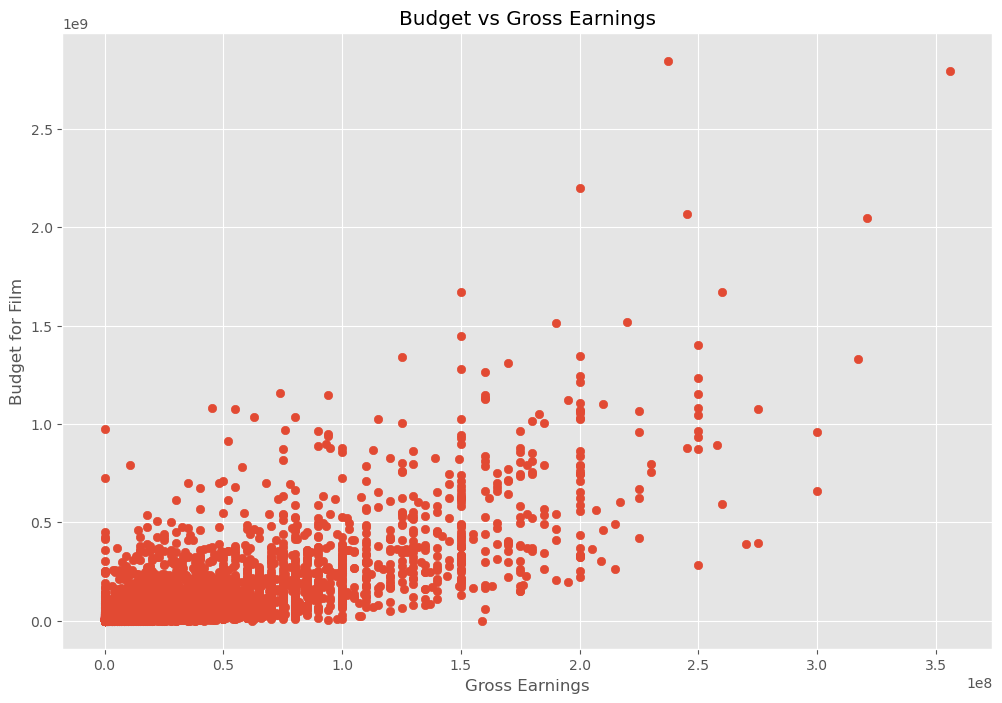

In [35]:
#Scatter plot with budget vs gross
plt.scatter(x=df['budget'],y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [34]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

     released  score      votes       director              writer  \
5445      NaT    7.8  1100000.0  James Cameron       James Cameron   
7445      NaT    8.4   903000.0  Anthony Russo  Christopher Markus   
3045      NaT    7.8  1100000.0  James Cameron       James Cameron   
6663      NaT    7.8   876000.0    J.J. Abrams     Lawrence Kasdan   
7244      NaT    8.4   897000.0  Anthony Russo  Christopher Markus   

                   star        country     budget       gross  \
5445    Sam Worthington  United States  237000000  2847246203   
7445  Robert Downey Jr.  United States  356000000  2797501328   
3045  Leonardo DiCaprio  United States  200000000  2201647264   
6663       Daisy Ridley  United States  245000000  2069521700   
7244  Robert Downey Jr.  United States  321000000  2048359754   

                    company  runtime yearcorrect  
5445  Twentieth Century Fox    162.0         NaT  
7445         Marvel Studios    181.0         NaT  
3045  Twentieth Century Fox    194.0         NaT  
6663              Lucasfilm    138.0         NaT  
7244         Marvel Studios    149.0         NaT

<AxesSubplot:xlabel='budget', ylabel='gross'>

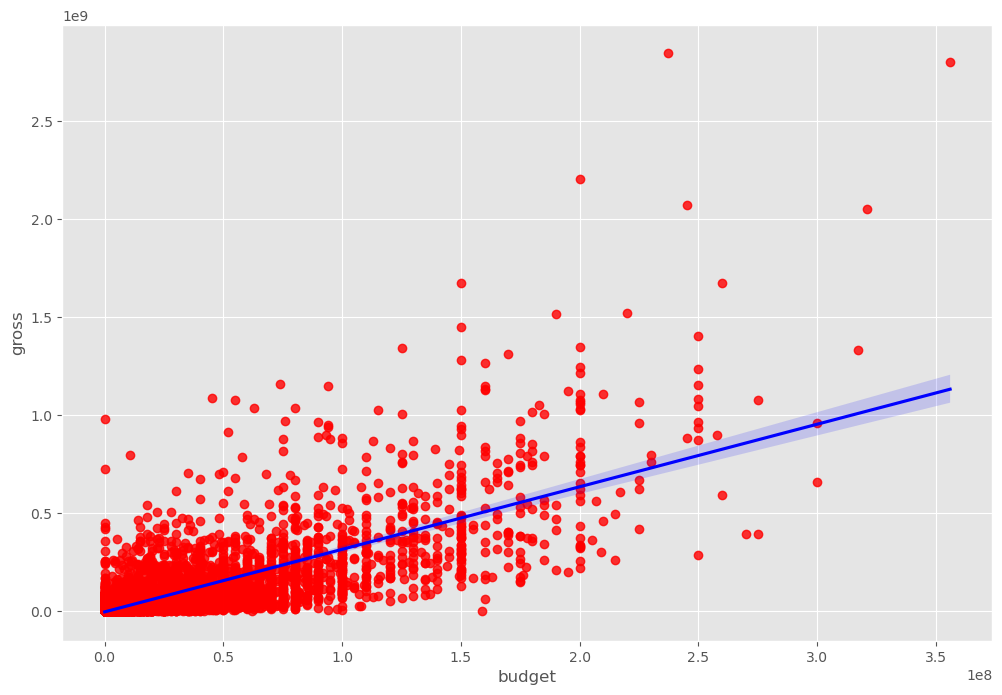

In [38]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [47]:
# Let's start looking at correlation
df.corr(method='pearson') # pearson, kendall, spearman

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.309212  0.261900  0.120811
score    0.097995  1.000000  0.409182  0.055665  0.186392  0.399451
votes    0.222945  0.409182  1.000000  0.486862  0.632834  0.309212
budget   0.309212  0.055665  0.486862  1.000000  0.750157  0.269510
gross    0.261900  0.186392  0.632834  0.750157  1.000000  0.245235
runtime  0.120811  0.399451  0.309212  0.269510  0.245235  1.000000

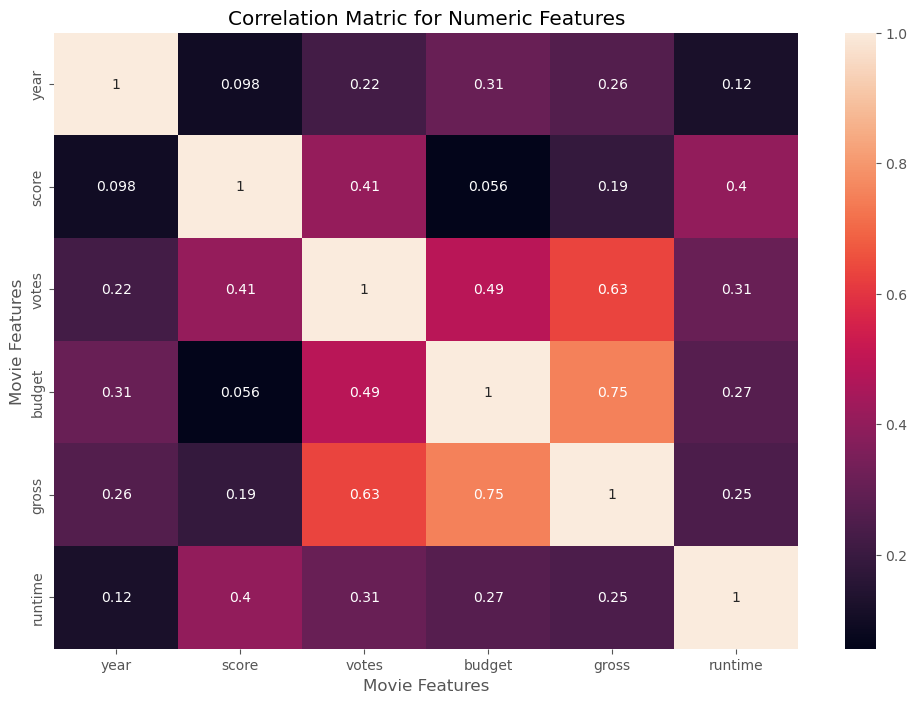

In [49]:
# High correlation between budget and gross
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [50]:
# Looks at Company
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

     released  score      votes       director              writer  \
5445      NaT    7.8  1100000.0  James Cameron       James Cameron   
7445      NaT    8.4   903000.0  Anthony Russo  Christopher Markus   
3045      NaT    7.8  1100000.0  James Cameron       James Cameron   
6663      NaT    7.8   876000.0    J.J. Abrams     Lawrence Kasdan   
7244      NaT    8.4   897000.0  Anthony Russo  Christopher Markus   

                   star        country     budget       gross  \
5445    Sam Worthington  United States  237000000  2847246203   
7445  Robert Downey Jr.  United States  356000000  2797501328   
3045  Leonardo DiCaprio  United States  200000000  2201647264   
6663       Daisy Ridley  United States  245000000  2069521700   
7244  Robert Downey Jr.  United States  321000000  2048359754   

                    company  runtime yearcorrect  
5445  Twentieth Century Fox    162.0         NaT  
7445         Marvel Studios    181.0         NaT  
3045  Twentieth Century Fox    194.0         NaT  
6663              Lucasfilm    138.0         NaT  
7244         Marvel Studios    149.0         NaT

In [60]:
'''df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df.numerized[col_name] = df_numerized[col_name].astype('category')
        df.numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized'''


df_numerized = df.copy()  # Make a copy of df to avoid modifying it directly
for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()


name  rating  genre  year released  score      votes  director  writer  \
5445   533       5      0  2009      NaT    7.8  1100000.0      1155    1778   
7445   535       5      0  2019      NaT    8.4   903000.0       162     743   
3045  6896       5      6  1997      NaT    7.8  1100000.0      1155    1778   
6663  5144       5      0  2015      NaT    7.8   876000.0      1125    2550   
7244   536       5      0  2018      NaT    8.4   897000.0       162     743   

      star  country     budget       gross  company  runtime  yearcorrect  
5445  2334       55  237000000  2847246203     2253    162.0            0  
7445  2241       55  356000000  2797501328     1606    181.0            0  
3045  1595       55  200000000  2201647264     2253    194.0            0  
6663   524       55  245000000  2069521700     1540    138.0            0  
7244  2241       55  321000000  2048359754     1606    149.0            0

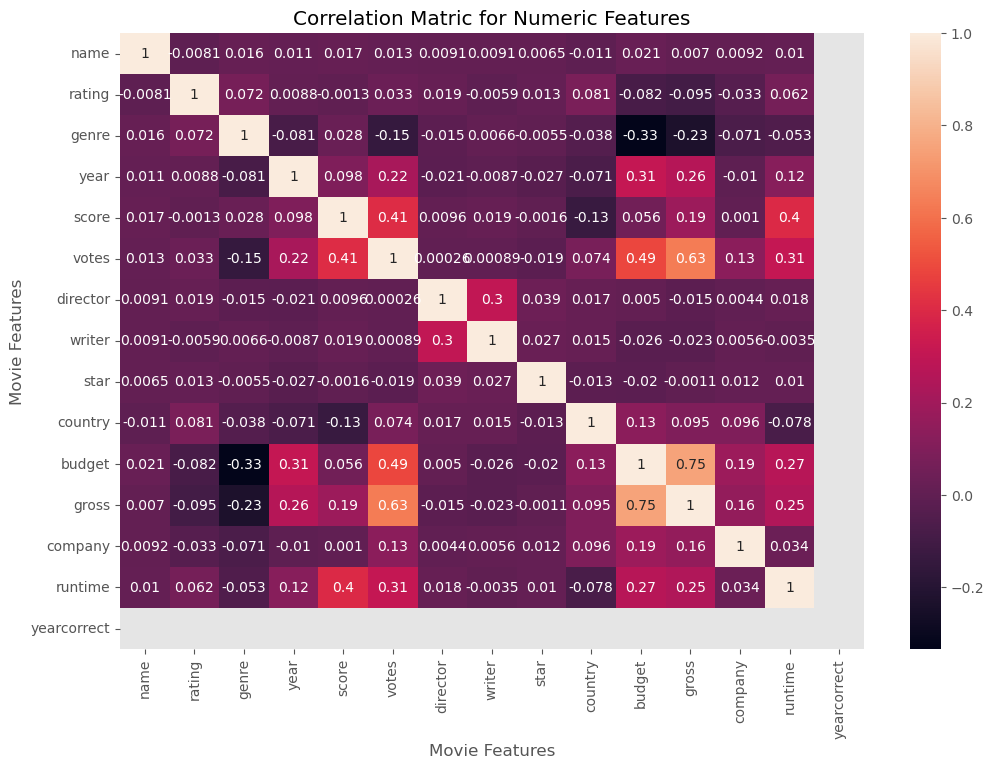

In [54]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [55]:
df_numerized.corr()

name    rating     genre      year     score     votes  \
name         1.000000 -0.008069  0.016355  0.011453  0.017097  0.013088   
rating      -0.008069  1.000000  0.072423  0.008779 -0.001314  0.033225   
genre        0.016355  0.072423  1.000000 -0.081261  0.027965 -0.145307   
year         0.011453  0.008779 -0.081261  1.000000  0.097995  0.222945   
score        0.017097 -0.001314  0.027965  0.097995  1.000000  0.409182   
votes        0.013088  0.033225 -0.145307  0.222945  0.409182  1.000000   
director     0.009079  0.019483 -0.015258 -0.020795  0.009559  0.000260   
writer       0.009081 -0.005921  0.006567 -0.008656  0.019416  0.000892   
star         0.006472  0.013405 -0.005477 -0.027242 -0.001609 -0.019282   
country     -0.010737  0.081244 -0.037615 -0.070938 -0.133348  0.073625   
budget       0.020548 -0.081939 -0.334021  0.309212  0.055665  0.486862   
gross        0.006989 -0.095450 -0.234297  0.261900  0.186392  0.632834   
company      0.009211 -0.032943 -0.071067 -0.010431  0.001030  0.133204   
runtime      0.010392  0.062145 -0.052711  0.120811  0.399451  0.309212   
yearcorrect       NaN       NaN       NaN       NaN       NaN       NaN   

             director    writer      star   country    budget     gross  \
name         0.009079  0.009081  0.006472 -0.010737  0.020548  0.006989   
rating       0.019483 -0.005921  0.013405  0.081244 -0.081939 -0.095450   
genre       -0.015258  0.006567 -0.005477 -0.037615 -0.334021 -0.234297   
year        -0.020795 -0.008656 -0.027242 -0.070938  0.309212  0.261900   
score        0.009559  0.019416 -0.001609 -0.133348  0.055665  0.186392   
votes        0.000260  0.000892 -0.019282  0.073625  0.486862  0.632834   
director     1.000000  0.299067  0.039234  0.017490  0.004976 -0.014916   
writer       0.299067  1.000000  0.027245  0.015343 -0.025911 -0.022997   
star         0.039234  0.027245  1.000000 -0.012998 -0.019952 -0.001129   
country      0.017490  0.015343 -0.012998  1.000000  0.131720  0.095325   
budget       0.004976 -0.025911 -0.019952  0.131720  1.000000  0.750157   
gross       -0.014916 -0.022997 -0.001129  0.095325  0.750157  1.000000   
company      0.004404  0.005646  0.012442  0.095548  0.186474  0.156745   
runtime      0.017624 -0.003511  0.010174 -0.078412  0.269510  0.245235   
yearcorrect       NaN       NaN       NaN       NaN       NaN       NaN   

              company   runtime  yearcorrect  
name         0.009211  0.010392          NaN  
rating      -0.032943  0.062145          NaN  
genre       -0.071067 -0.052711          NaN  
year        -0.010431  0.120811          NaN  
score        0.001030  0.399451          NaN  
votes        0.133204  0.309212          NaN  
director     0.004404  0.017624          NaN  
writer       0.005646 -0.003511          NaN  
star         0.012442  0.010174          NaN  
country      0.095548 -0.078412          NaN  
budget       0.186474  0.269510          NaN  
gross        0.156745  0.245235          NaN  
company      1.000000  0.034402          NaN  
runtime      0.034402  1.000000          NaN  
yearcorrect       NaN       NaN          NaN

In [56]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             score          0.017097
             votes          0.013088
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020548
             gross          0.006989
             company        0.009211
             runtime        0.010392
             yearcorrect         NaN
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             score         -0.001314
             votes          0.033225
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
             budget        -0.081939
             gross         -0.095450
 

In [57]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.334021
budget       genre         -0.334021
genre        gross         -0.234297
gross        genre         -0.234297
votes        genre         -0.145307
genre        votes         -0.145307
score        country       -0.133348
country      score         -0.133348
gross        rating        -0.095450
rating       gross         -0.095450
budget       rating        -0.081939
rating       budget        -0.081939
year         genre         -0.081261
genre        year          -0.081261
runtime      country       -0.078412
country      runtime       -0.078412
genre        company       -0.071067
company      genre         -0.071067
year         country       -0.070938
country      year          -0.070938
genre        runtime       -0.052711
runtime      genre         -0.052711
genre        country       -0.037615
country      genre         -0.037615
rating       company       -0.032943
company      rating        -0.032943
year         star          -0.027242
s

In [ ]:
# Votes and budget have the highest correlation to gross earnings
# Company has Law correlation